# **Deep learning network design and training**

## Feed forward fully connected network

### Import modules :

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Load and Prepare **mnist** dataset :

3

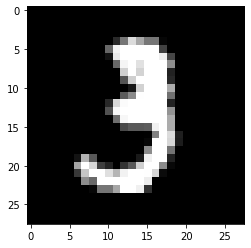

In [ ]:
#Here load mnist dataset and split them on x_train,y_train,x_test,y_test

dataset=tf.keras.datasets.mnist
### START CODE HERE ###  
(x_train,y_train),(x_test,y_test)=dataset.load_data()
### END CODE HERE ### 

# Show an example
plt.imshow(x_train[10],cmap='gray')
y_train[10]

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
#Reshape x_train for network input
### START CODE HERE ###  
x_train=x_train.reshape(60000, 784).astype("float32")/255
x_test=x_test.reshape(10000, 784).astype("float32")/255
y_train=y_train.astype("float32")
y_tets=y_test.astype("float32")
### END CODE HERE ### 


print(x_train.shape)

(60000, 784)


In [ ]:
x_val=x_train[-10000:]
y_val=y_train[-10000:]
x_train=x_train[:-10000]
y_train=y_train[:-10000]

print(x_train.shape)

(50000, 784)


### **Design** and **train** feed forward fully connected network :


In [ ]:
#Design a model
model=tf.keras.models.Sequential([
  ### START CODE HERE ###  
  tf.keras.layers.Dense(256, activation='relu',input_shape=(784,)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(10,activation='Softmax')
  ### END CODE HERE ### 
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.ops import losses
#Compile your model
model.compile(### START CODE HERE ### 
              optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
                
              ### END CODE HERE ### 
              )


In [ ]:
#Finally train
model.fit(
  ### START CODE HERE ###  
  x_train,y_train,epochs=50,batch_size=64,validation_data=(x_val,y_val)
  ### END CODE HERE ### 
  )



Epoch 1/50
782/782 [==============================] - 5s 6ms/step - loss: 1.5920 - accuracy: 0.8774 - val_loss: 1.5482 - val_accuracy: 0.9166
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 1.5129 - accuracy: 0.9498 - val_loss: 1.5025 - val_accuracy: 0.9596
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 1.5006 - accuracy: 0.9613 - val_loss: 1.4984 - val_accuracy: 0.9632
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.4943 - accuracy: 0.9669 - val_loss: 1.4943 - val_accuracy: 0.9674
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 1.4896 - accuracy: 0.9717 - val_loss: 1.4909 - val_accuracy: 0.9703
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 1.4863 - accuracy: 0.9750 - val_loss: 1.4916 - val_accuracy: 0.9693
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.4841 - accuracy: 0.9773 - val_loss: 1.4915 - val_accuracy: 0.9695
Epoch 

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 2ms/step - loss: 1.4811 - accuracy: 0.9800

Testing loss: 1.48, acc: 0.98%


## Fully connected **CNN** based network 

### Load and Prepare **fashion mnist** dataset :

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

2

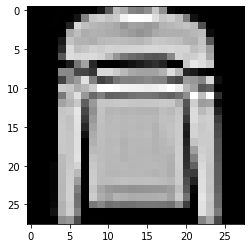

In [ ]:
#Here load fashion mnist dataset and split them on x_train,y_train,x_test,y_test

dataset=tf.keras.datasets.fashion_mnist


### START CODE HERE ###  
(x_train,y_train),(x_test,y_test)=dataset.load_data()

### END CODE HERE ### 

# Show an example
plt.imshow(x_train[5],cmap='gray')
y_train[5]


In [ ]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [ ]:
#Reshape x_train for network input
### START CODE HERE ###  
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

y_train=tf.keras.utils.to_categorical( y_train, dtype='float32')
y_test=tf.keras.utils.to_categorical(  y_test, dtype='float32')
### END CODE HERE ### 
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


### **Design** and **train** fully connected **CNN** based network :

In [ ]:
#Define a simple model
layers=tf.keras.layers

model=tf.keras.models.Sequential([
    ### START CODE HERE ###  
    layers.Conv2D(32,5,activation="relu",input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
      
    layers.Conv2D(64,3,activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    ### END CODE HERE ### 
    layers.Flatten(),
    ### START CODE HERE ###  
    layers.Dense(120,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10,activation="Softmax")
    ### END CODE HERE ### 
])



In [ ]:
#Compile

model.compile(### START CODE HERE ### 
              loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy']
           
              ### END CODE HERE ### 
              )
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_3 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 10, 10, 64)       256       
 hNormalization)                                                 
                                                     

In [ ]:
#Train

model.fit(
  ### START CODE HERE ###  
  x_train,y_train,epochs=15,batch_size=64,validation_split=0.2
  ### END CODE HERE ### 
  )

Epoch 1/15
750/750 [==============================] - 4s 5ms/step - loss: 0.4967 - accuracy: 0.8271 - val_loss: 0.3407 - val_accuracy: 0.8738
Epoch 2/15
750/750 [==============================] - 3s 5ms/step - loss: 0.3349 - accuracy: 0.8804 - val_loss: 0.3015 - val_accuracy: 0.8891
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2934 - accuracy: 0.8958 - val_loss: 0.2977 - val_accuracy: 0.8938
Epoch 4/15
750/750 [==============================] - 3s 5ms/step - loss: 0.2625 - accuracy: 0.9059 - val_loss: 0.2841 - val_accuracy: 0.8949
Epoch 5/15
750/750 [==============================] - 3s 5ms/step - loss: 0.2468 - accuracy: 0.9107 - val_loss: 0.2652 - val_accuracy: 0.9066
Epoch 6/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2291 - accuracy: 0.9178 - val_loss: 0.3397 - val_accuracy: 0.8827
Epoch 7/15
750/750 [==============================] - 3s 5ms/step - loss: 0.2156 - accuracy: 0.9231 - val_loss: 0.3613 - val_accuracy: 0.8806
Epoch 

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f '%(loss, acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.8967

Testing loss: 0.32, acc: 0.90 
